In [57]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_pymaceuticals = pd.merge(trial_df,mouse_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

complete_pymaceuticals.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [58]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_group = complete_pymaceuticals.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
                     
# Convert to DataFrame
mean_df = pd.DataFrame(mean_group).reset_index()

# Preview DataFrame
mean_df.head()
                             
                              

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [59]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_group = complete_pymaceuticals.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
                     
# Convert to DataFrame
sem_df = pd.DataFrame(sem_group).reset_index()

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [60]:
# Minor Data Munging to Re-Format the Data Frames
complete_mean = mean_df.pivot(index='Timepoint',
                             columns='Drug',
                             values = 'Tumor Volume (mm3)')
complete_mean.head()                


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


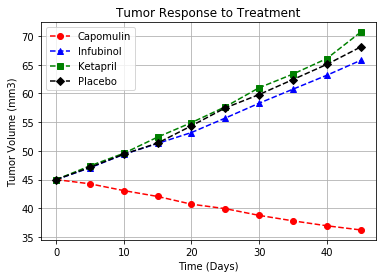

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate the Plot (with Error Bars)
x_axis=complete_mean.index
y_c=complete_mean['Capomulin']
y_i=complete_mean['Infubinol']
y_k=complete_mean['Ketapril']
y_p=complete_mean['Placebo']

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(b=True)
plt.plot(x_axis,y_c,color='red',marker='o',linestyle='--')
plt.plot(x_axis,y_i,color='blue',marker='^',linestyle='--')
plt.plot(x_axis,y_k,color='green',marker='s',linestyle='--')
plt.plot(x_axis,y_p,color='k',marker='D',linestyle='--')

plt.legend()
plt.show()


# Save the Figure

plt.savefig('tumor_response.png',dpi=300)

## Metastatic Response to Treatment

In [62]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
meta_group = complete_pymaceuticals.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
                     
# Convert to DataFrame
meta_mean = pd.DataFrame(meta_group)

# Preview DataFrame
meta_mean.head()# Store the Mean Met. Site Data Grouped by Drug and Timepoint 



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [63]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_err = complete_pymaceuticals.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
                     
# Convert to DataFrame
meta_error = pd.DataFrame(meta_err)

# Preview DataFrame
meta_error.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [64]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean = pd.DataFrame(meta_group).reset_index()

summary_meta = meta_mean.pivot(index='Timepoint',
                             columns='Drug',
                             values = 'Metastatic Sites')

# Preview that Reformatting worked
summary_meta.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


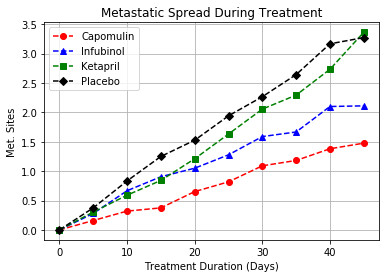

<Figure size 432x288 with 0 Axes>

In [65]:
# Generate the Plot 
x_axis=complete_mean.index
y_c=summary_meta['Capomulin']
y_i=summary_meta['Infubinol']
y_k=summary_meta['Ketapril']
y_p=summary_meta['Placebo']

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(b=True)
plt.plot(x_axis,y_c,color='red',marker='o',linestyle='--')
plt.plot(x_axis,y_i,color='blue',marker='^',linestyle='--')
plt.plot(x_axis,y_k,color='green',marker='s',linestyle='--')
plt.plot(x_axis,y_p,color='k',marker='D',linestyle='--')

plt.legend()
plt.show()


# Save the Figure

plt.savefig('metastic_spread.png',dpi=300)

## Survival Rates

In [66]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_group = complete_pymaceuticals.groupby(['Drug','Timepoint'])['Mouse ID'].count()
                     
# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_group).reset_index()

# Preview DataFrame
mouse_count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [67]:
# Minor Data Munging to Re-Format the Data Frames
summary_mouse = mouse_count.pivot(index='Timepoint',
                             columns='Drug',
                             values = 'Mouse ID')

# Preview that Reformatting worked
summary_mouse


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [68]:
# Generate the Plot (Accounting for percentages)
mouse_start = 25

percent_survival=pd.DataFrame(summary_mouse['Capomulin']/mouse_start*100)
percent_survival['Infubinol']=summary_mouse['Infubinol']/mouse_start*100
percent_survival['Ketapril']=summary_mouse['Ketapril']/mouse_start*100
percent_survival['Placebo']=summary_mouse['Placebo']/mouse_start*100

percent_survival.head()



,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


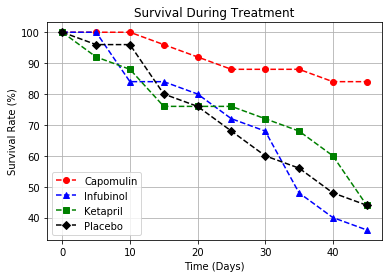

<Figure size 432x288 with 0 Axes>

In [69]:
# Generate the Plot 
x_axis=complete_mean.index
y_c=percent_survival['Capomulin']
y_i=percent_survival['Infubinol']
y_k=percent_survival['Ketapril']
y_p=percent_survival['Placebo']

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid(b=True)
plt.plot(x_axis,y_c,color='red',marker='o',linestyle='--')
plt.plot(x_axis,y_i,color='blue',marker='^',linestyle='--')
plt.plot(x_axis,y_k,color='green',marker='s',linestyle='--')
plt.plot(x_axis,y_p,color='k',marker='D',linestyle='--')

plt.legend()
plt.show()


# Save the Figure

plt.savefig('survival_rate.png',dpi=300)

## Summary Bar Graph

In [70]:
# Calculate the percent changes for each drug
percent_changes=(complete_mean.loc[45,:]-complete_mean.loc[0,:])/complete_mean.loc[0,:]*100

# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

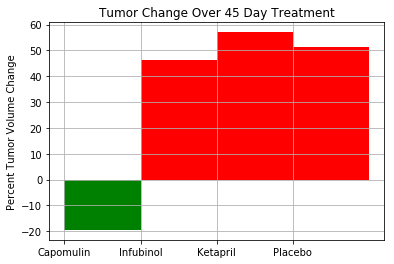

In [71]:
# Store all Relevant Percent Changes into a Tuple
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
tumor_change=(percent_changes.Capomulin,percent_changes.Infubinol,percent_changes.Ketapril,percent_changes.Placebo)

# change the color of bars to red when positive, green when negative
colors = []
for value in tumor_change:
    if value < 0:
        colors.append('g')
    else:
        colors.append('r')


# plot the bar graph 
plt.bar(drugs,tumor_change,width=1,align='edge',color=colors)

plt.grid()
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('Percent Tumor Volume Change')


# Save the Figure
plt.savefig('tumor_change_bar.png',dpi=300)

# Show the Figure
plt.show()